In [ ]:
# CELL 1 (do not change)
"""import statements and boiler plate code"""
import tensorflow_datasets as tfds
import tensorflow as tf 
import tensorflow.keras as ks
import tensorflow.keras.backend as K
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np

from typing import *
import sys

if sys.version_info >= (3, 8, 0):
    from math import prod
else:
    # math.prod shim for Python 3.7 and older
    def prod(iterable, *, start=1):
        total = start
        for element in iterable:
            total *= element
        return (total)

def pretruberate(latent, model, bit, value):
    if not isinstance(latent, np.ndarray):
        latent = latent.numpy()
    latent[0][bit] = step
    return model.decode(latent)

def pretruberate_range(latent, image, model, bit, vals):
    fig, ax = plt.subplots(1, 11)
    fig.set_size_inches(w = 15, h = 30)
    for i, step in enumerate(vals):
        rec = pretruberate(latent, model, bit, step)
        ax[i].imshow(rec[0, :, :, 0])
        ax[i].axis('off')
    ax[10].imshow(image[0, :, :, 0])
    ax[10].axis('off')
    plt.show()
    pass

def get_sample(val, index, model, batch_size = None):
    sample = val.skip(index).take(1)
    for image, label in sample:
        break
    if batch_size is None:
        latent = model.predict(image).numpy()
    else:
        latent = model.predict(image, batch_size = batch_size).numpy()
    return image, latent


def display(val, model, n = 10, x0 = 0, y0 = 1): 
    image, latent = get_sample(val, 11, model)
    latent = model.predict(image).numpy()
    latent = latent[0, :]
    print(latent.shape)
    norm = tfp.distributions.Normal(0,1)
    vals_x = norm.quantile(np.linspace(0.05, 0.95, n))
    vals_y = norm.quantile(np.linspace(0.05, 0.95, n))

    fig, ax = plt.subplots(n, n)
    fig.set_size_inches(w = 10, h = 10)
    for i, x in enumerate(vals_x):
        for j, y in enumerate(vals_y):
            latent[x0], latent[y0] = x, y
            rec = tf.sigmoid(model.decode(np.array([latent])))
            ax[i, j].imshow(rec[0,:,:,0], cmap='gnuplot2')
            ax[i, j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()
    pass

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)
Tensor("arg

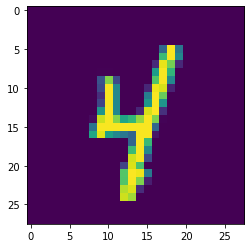

random value:  NotImplemented


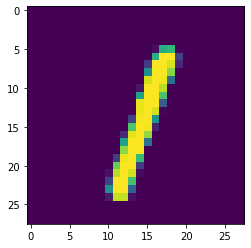

random value:  NotImplemented


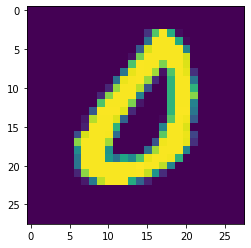

random value:  NotImplemented


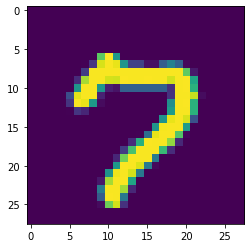

random value:  NotImplemented


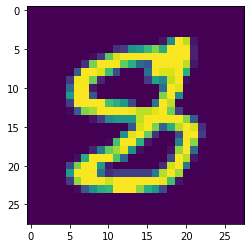

random value:  NotImplemented


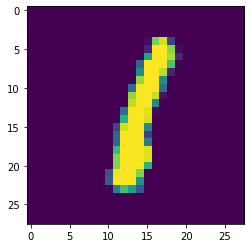

random value:  NotImplemented


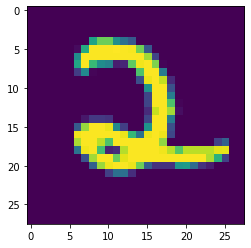

random value:  NotImplemented


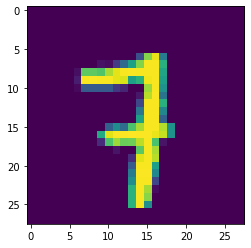

random value:  NotImplemented


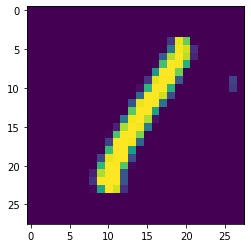

random value:  NotImplemented


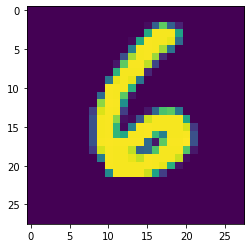

random value:  NotImplemented


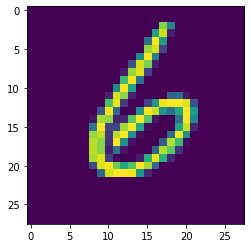

random value:  NotImplemented


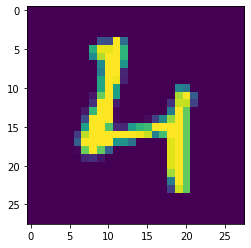

In [ ]:
# CELL 2
def preprocess(image: tf.Tensor, label: tf.Tensor, disp: bool = False):
    # TODO: fill in this function
    image = tf.cast(image, tf.float32) / 255
    rng = np.random.default_rng()
    randint = rng.integers(26,28,endpoint=True)
    
    if disp:
        tf.print("random value: ", randint)
    return image, image

"""script to load data set and print info"""
(train, test), info = tfds.load("mnist", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
print(info)

""" Test """
train = train.map(lambda x, y: preprocess(x, y, disp = True)).batch(1)
for i, (image, _) in enumerate(train):
    plt.imshow(image[0, ..., 0])
    plt.show()
    if i > 10:
        break

In [ ]:
# CELL 3
""" Custom Building Blocks """
class ResidualBlock(ks.layers.Layer):
    def __init__(self, 
                 filters: int, 
                 dilation_rate: Tuple[int, int] = (1,1), 
                 kernel_initializer: str = 'glorot_uniform', 
                 momentum: float = 0.99, 
                 epsilon: float = 0.001, 
                 downsample: bool = False,
                 use_bias: bool = False, 
                 use_sync: bool = True, 
                 kernel_regularizer = None, 
                 bias_regularizer = None):
        
        # parameters Conv2D
        self._filters = filters
        self._dilation_rate = dilation_rate
        self._kernel_initializer = kernel_initializer
        self._kernel_regularizer = kernel_regularizer
        self._bias_regularizer = bias_regularizer
        self._use_bias = use_bias
        self._use_sync = use_sync

        # parameters Batch Norm
        if K.image_data_format() == "channels_last":
            # channels_last: (batch_size, height, width, channels)
            self._axis = -1
        else:
            # not channels_last: (batch_size, channels, height, width)
            self._axis = 1

        self._momentum = momentum 
        self._epsilon = epsilon 

        # downsample
        self._downsample = downsample

        if downsample:
            self._strides = (2,2)
        else:
            self._strides = (1,1)

        # TODO: set the activation function to the same one that is used in the paper
        self._activation = NotImplemented

        super(ResidualBlock, self).__init__()

    def build(self, ishape):
        # TODO: fill in this function
        raise NotImplementedError
        super(ResidualBlock, self).build(ishape)

    def call(self, inputs):
        # TODO: fill in this function
        raise NotImplementedError
        return self._activation(x)

"""Testing"""
vis = train.take(10)
for image, t in vis:
    x = ResidualBlock(filters = 3)(image)
    y = ResidualBlock(filters = 32, downsample=True)(image)
    print(x.shape, y.shape)

random value:  fill in the blank
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)
random value:  fill in the blank
(1, 28, 28, 3) (1, 14, 14, 32)


In [ ]:
# CELL 4
'''
testing your pipeline and you custom block together 

mnist input shape  = (28, 28, 1)

DEEP MIND Implementation -> very stable
 -> loss function is more stable 
 -> batch norm causes exploding gradients 
'''

@tf.function
def ae_loss(x, x_reconstruction, loss = ks.losses.mse):
    return -tf.reduce_sum(loss(x, x_reconstruction), axis = [1, 2, 3])

@tf.function
def regularize(z, mu, log_sigma):
    # mu = tf.reduce_sum(mu, axis = [1])
    # sigma = tf.reduce_sum(sigma, axis = [1])
    # term = tf.math.exp(sigma) + (mu ** 2) - 1 - sigma
    log2pi = tf.math.log(2. * np.pi)
    term = -0.5 * (((z - mu) ** 2.) * tf.math.exp(-log_sigma) + log_sigma + log2pi)
    return tf.reduce_sum(term, axis = 1)

@tf.function
def vae_loss(term1, term2):
    return -tf.reduce_mean(term1 + term2)

class VAE(ks.Model):
    def __init__(self, input_shape, latent_size = None, latent_dims = None, batch_size = 40):
        super(VAE, self).__init__()
        self.ishape = input_shape
        self.latent_size = latent_size
        self.batch_size = batch_size
        self.encoder = None
        self.decoder = None

        print(latent_dims)
        self.encoder = self.get_encoder(latent_size)
        self.decoder = self.get_decoder(latent_dims)
        return
    
    def get_encoder(self, latent_size):
        '''
        NOTE
        ----
        the encoder is a simple NN, CNN, RNN, or transformer structure that maps to a latent vector
        the details of the network do not need to be specific, but can be anything
        the attributes of this network:
            - downsample the input vector 
            - map to a vector
        '''
        encoder = ks.Sequential()
        encoder.add(ks.layers.Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        encoder.add(ks.layers.BatchNormalization())
        encoder.add(ks.layers.ReLU())
        encoder.add(ResidualBlock(64, downsample=True))
        encoder.add(ks.layers.Flatten())
        encoder.add(ks.layers.Dense(512))
        encoder.add(ks.layers.BatchNormalization())
        encoder.add(ks.layers.ReLU())

        # use latent_size + latent_size, so that half the vector is learing the z_mu (mean) other half is learning z_sigma (standard deviation)
        encoder.add(ks.layers.Dense(latent_size + latent_size))
        return encoder
    
    def get_decoder(self, dimension):
        vec_size = prod(dimension)
        decoder = ks.Sequential()
        decoder.add(ks.layers.Dense(vec_size))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Reshape(dimension, input_shape = (None, self.latent_size, )))
        decoder.add(ks.layers.Conv2DTranspose(64, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(64, kernel_size = (3,3), strides = (2,2), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(32, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(1, kernel_size = (2,2), strides = (1,1), padding = "valid"))
        return decoder

    def reparameterize(self, z_mu, z_sigma):
        sample = tf.random.normal(shape = (self.batch_size, z_mu.shape[-1]), mean = 0, stddev=1)
        z = z_mu + tf.math.exp(z_sigma) * sample
        return z

    def decode(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        x = self.decoder(inputs)
        return x

    def call(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        z_full = self.encoder(inputs)

        # num_or_size_splits is a scalar to the value gets split evenly in the same way every time
        z_mu, z_sigma = tf.split(z_full, num_or_size_splits=2, axis = -1)
        z = self.reparameterize(z_mu, z_sigma)
        x = self.decoder(z)
        return x, z, z_mu, z_sigma

    def predict(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        z_full = self.encoder(inputs)
        z_mu, z_sigma = tf.split(z_full, num_or_size_splits=2, axis = -1)
        z = self.reparameterize(z_mu, z_sigma)
        return z

    def train_step(self, data):
        # use with model.fit
        # unpack the input data
        x, x_reconstruction = data

        with tf.GradientTape() as tape:
            # call self or model to make a prediction
            x_hat, z, z_mu, z_sigma = self(x, training = True)
            p_xz = ae_loss(x, x_hat, loss = tf.nn.sigmoid_cross_entropy_with_logits) # computes sigmoid for you 
            p_z = regularize(z, 0., 0.)
            q_zx = regularize(z, z_mu, z_sigma)
            loss = self.compiled_loss(p_xz, p_z - q_zx , regularization_losses=self.losses)

        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(x, x_hat)
        ret = {m.name: m.result() for m in self.metrics}
        ret.update({"loss2": p_xz, "reg": q_zx})
        return ret
    


EPOCHS = 20
BATCH_SIZE = 80
LATENT_SIZE = 2
loss = vae_loss
optimizer = ks.optimizers.Adam()
printing = False
losses = []

    
(train, test), info = tfds.load("mnist", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
train = train.map(lambda x, y: preprocess(x, y)).batch(40)
test = test.map(lambda x, y: preprocess(x, y)).batch(1)

# if the output looks blurry, increase the epochs or comment out the randome crops. 
# we will still use random crops to test that the data pipeline is functional, so dont delete it
# if you comment it out, in the machine learning question google doc, just leave a 
# note for this part indicating that you choose to comment out the random crops
# commenting it out will not affect your possition on the team

model = VAE(input_shape=(28,28,1), latent_size = LATENT_SIZE, latent_dims = (10,10,2))
model.compile(loss=loss, optimizer=optimizer, metrics = [tf.keras.metrics.MeanSquaredError()])
epoch_data = model.fit(train, epochs=EPOCHS, validation_data=test)

# if you dont want to train again, just this in a new cell
display(test, model, x0 = 0, y0 = 1, n = 30)

In [ ]:
#CELL 5
"""
Write the provided/incorrect loss function in `ae_loss`.

Instructions for this code block, questions can be found
on the google doc associated with this assignment.

To re-iterate the instruction doc: This step is not required, but it will be
extra-credit for the competition (see Rock-Paper-Scissors CNN in doc).
"""

@tf.function
def ae_loss(x, x_reconstruction, mu, log_sigma, batch_size, latent_size):
    # TODO: fill in this function
    raise NotImplementedError

class VAE(ks.Model):
    def __init__(self, input_shape, latent_size = None, latent_dims = None, batch_size = 40):
        super(VAE, self).__init__()
        self.ishape = input_shape
        self.latent_size = latent_size
        self.batch_size = batch_size
        self.encoder = None
        self.decoder = None

        self.encoder = self.get_encoder(latent_size)
        self.decoder = self.get_decoder(latent_dims)

        print(latent_dims)
        return
    
    def get_encoder(self, latent_size):
        '''
        NOTE
        ----
        the encoder is a simple NN, CNN, RNN, or transformer structure that maps to a latent vector
        the details of the network do not need to be specific, but can be anything
        the attributes of this network:
            - downsample the input vector 
            - map to a vector
        '''
        encoder = ks.Sequential()
        encoder.add(ks.layers.Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        encoder.add(ks.layers.BatchNormalization())
        encoder.add(ks.layers.ReLU())
        encoder.add(ResidualBlock(64, downsample=True))
        encoder.add(ks.layers.Flatten())
        encoder.add(ks.layers.Dense(512))
        encoder.add(ks.layers.BatchNormalization())
        encoder.add(ks.layers.ReLU())

        # use latent_size + latent_size, so that half the vector is learing the z_mu (mean) other half is learning z_sigma (standard deviation)
        encoder.add(ks.layers.Dense(latent_size + latent_size))
        return encoder
    
    def get_decoder(self, dimension):
        vec_size = prod(dimension)
        decoder = ks.Sequential()
        decoder.add(ks.layers.Dense(vec_size))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Reshape(dimension, input_shape = (None, self.latent_size, )))
        decoder.add(ks.layers.Conv2DTranspose(64, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(64, kernel_size = (3,3), strides = (2,2), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(32, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(1, kernel_size = (2,2), strides = (1,1), padding = "valid", activation = 'sigmoid'))
        return decoder

    def reparameterize(self, z_mu, z_sigma):
        sample = tf.random.normal(shape = (self.batch_size, z_mu.shape[-1]))
        z = z_mu + tf.math.exp(z_sigma) * sample
        return z

    def decode(self, inputs):
        x = self.decoder(inputs)
        return x

    def call(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        z_full = self.encoder(inputs)
        # num_or_size_splits is a scalar to the value gets split evenly in the same way every time
        z_mu, z_sigma = tf.split(z_full, num_or_size_splits=2, axis = -1)
        z = self.reparameterize(z_mu, z_sigma)
        x = self.decoder(z)
        return x, z, z_mu, z_sigma

    def predict(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        tf.print(self.batch_size)
        z_full = self.encoder(inputs)
        z_mu, z_sigma = tf.split(z_full, num_or_size_splits=2, axis = -1)
        z = self.reparameterize(z_mu, z_sigma)
        return z

    def train_step(self, data):
        # use with model.fit
        # unpack the input data
        x, x_reconstruction = data

        with tf.GradientTape() as tape:
            # call self or model to make a prediction
            x_hat, z, z_mu, z_sigma = self(x, training = True)
            loss, kl = ae_loss(x, x_hat, z_mu, z_sigma, tf.shape(x)[0], self.latent_size)

        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(x, x_hat)
        ret = {m.name: m.result() for m in self.metrics}
        ret.update({"loss":loss, "regular": kl})
        return ret
    
(train, test), info = tfds.load("mnist", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
train = train.map(preprocess).batch(40)
test = test.map(preprocess).batch(1)

# if the output looks blurry, increase the epochs or comment out the random crops. 
# we will still use random crops to test that the data pipeline is functional, so dont delete it
# if you comment it out, in the machine learning question google doc, just leave a 
# note for this part indicating that you choose to comment out the random crops
# commenting it out will not affect your possition on the team

LATENT_SIZE = 2
optimizer = 'rmsprop'
model = VAE(input_shape=(28,28,1), latent_size = LATENT_SIZE, latent_dims = (10, 10, 2))
model.compile(loss=None, optimizer=optimizer, metrics = [tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.BinaryCrossentropy()])
epoch_data = model.fit(train, epochs=20, validation_data=test)

# if you dont want to train again, just this in a new cell
display(test, model, x0 = 0, y0 = 1, n = 30)

In [ ]:
#CELL 6
"""
Write your (the corrected) loss function in `ae_loss`.

Instructions for this code block, questions can be found
on the google doc associated with this assignment.

To re-iterate the instruction doc: This step is not required, but it will be
extra-credit for the competition (see Rock-Paper-Scissors CNN in doc).
"""

@tf.function
def ae_loss(x, x_reconstruction, mu, log_sigma, batch_size, latent_size):
    # TODO: fill in this function
    raise NotImplementedError

class VAE(ks.Model):
    def __init__(self, input_shape, latent_size = None, latent_dims = None, batch_size = 40):
        super(VAE, self).__init__()
        self.ishape = input_shape
        self.latent_size = latent_size
        self.batch_size = batch_size
        self.encoder = None
        self.decoder = None

        self.encoder = self.get_encoder(latent_size)
        self.decoder = self.get_decoder(latent_dims)

        print(latent_dims)
        return
    
    def get_encoder(self, latent_size):
        '''
        NOTE
        ----
        the encoder is a simple NN, CNN, RNN, or transformer structure that maps to a latent vector
        the details of the network do not need to be specific, but can be anything
        the attributes of this network:
            - downsample the input vector 
            - map to a vector
        '''
        encoder = ks.Sequential()
        encoder.add(ks.layers.Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        encoder.add(ks.layers.BatchNormalization())
        encoder.add(ks.layers.ReLU())
        encoder.add(ResidualBlock(64, downsample=True))
        encoder.add(ks.layers.Flatten())
        encoder.add(ks.layers.Dense(512))
        encoder.add(ks.layers.BatchNormalization())
        encoder.add(ks.layers.ReLU())

        # use latent_size + latent_size, so that half the vector is learing the z_mu (mean) other half is learning z_sigma (standard deviation)
        encoder.add(ks.layers.Dense(latent_size + latent_size))
        return encoder
    
    def get_decoder(self, dimension):
        vec_size = prod(dimension)
        decoder = ks.Sequential()
        decoder.add(ks.layers.Dense(vec_size))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Reshape(dimension, input_shape = (None, self.latent_size, )))
        decoder.add(ks.layers.Conv2DTranspose(64, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(64, kernel_size = (3,3), strides = (2,2), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(32, kernel_size = (3,3), strides = (1,1), padding = "valid"))
        decoder.add(ks.layers.ReLU())
        decoder.add(ks.layers.Conv2DTranspose(1, kernel_size = (2,2), strides = (1,1), padding = "valid", activation = 'sigmoid'))
        return decoder

    def reparameterize(self, z_mu, z_sigma):
        sample = tf.random.normal(shape = (self.batch_size, z_mu.shape[-1]))
        z = z_mu + tf.math.exp(z_sigma) * sample
        return z

    def decode(self, inputs):
        x = self.decoder(inputs)
        return x

    def call(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        z_full = self.encoder(inputs)
        # num_or_size_splits is a scalar to the value gets split evenly in the same way every time
        z_mu, z_sigma = tf.split(z_full, num_or_size_splits=2, axis = -1)
        z = self.reparameterize(z_mu, z_sigma)
        x = self.decoder(z)
        return x, z, z_mu, z_sigma

    def predict(self, inputs):
        self.batch_size = tf.shape(inputs)[0]
        tf.print(self.batch_size)
        z_full = self.encoder(inputs)
        z_mu, z_sigma = tf.split(z_full, num_or_size_splits=2, axis = -1)
        z = self.reparameterize(z_mu, z_sigma)
        return z

    def train_step(self, data):
        # use with model.fit
        # unpack the input data
        x, x_reconstruction = data

        with tf.GradientTape() as tape:
            # call self or model to make a prediction
            x_hat, z, z_mu, z_sigma = self(x, training = True)
            loss, kl = ae_loss(x, x_hat, z_mu, z_sigma, tf.shape(x)[0], self.latent_size)

        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(x, x_hat)
        ret = {m.name: m.result() for m in self.metrics}
        ret.update({"loss":loss, "regular": kl})
        return ret
    
(train, test), info = tfds.load("mnist", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
train = train.map(preprocess).batch(40)
test = test.map(preprocess).batch(1)

# if the output looks blurry, increase the epochs or comment out the random crops. 
# we will still use random crops to test that the data pipeline is functional, so dont delete it
# if you comment it out, in the machine learning question google doc, just leave a 
# note for this part indicating that you choose to comment out the random crops
# commenting it out will not affect your possition on the team

LATENT_SIZE = 2
optimizer = 'rmsprop'
model = VAE(input_shape=(28,28,1), latent_size = LATENT_SIZE, latent_dims = (10, 10, 2))
model.compile(loss=None, optimizer=optimizer, metrics = [tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.BinaryCrossentropy()])
epoch_data = model.fit(train, epochs=20, validation_data=test)

# if you dont want to train again, just this in a new cell
display(test, model, x0 = 0, y0 = 1, n = 30)

In [ ]:
# CELL 7
# More data pipe lines YAY!!!
'''
copy the pipeline above 

to the pipeline:
    - add a random flip
    - random hue, max alpha = 0.3
    - random brightness, max alpha = 0.3
    - random_contrast, min = 0.9, max = 1.1
'''
def preprocess(image: tf.Tensor, label: tf.Tensor, depth = 3, disp: bool = False):
    shape = tf.shape(image)
    image = tf.cast(image, dtype = tf.float32)
    image = image/255

    crop_1 = tf.cast(tf.shape(image)[0] * 22/28, dtype = tf.int32)
    crop_2 = tf.cast(tf.shape(image)[1] * 26/28, dtype = tf.int32)

    """
    copy code from previous pipeline but use crop_1 and crop_2 as the range within which to generate a random number
    """

    # new additions
    if (tf.shape(image)[-1] == 3):
        """
        add:
            - random flip
            - random hue, max alpha = 0.3
            - random brightness, max alpha = 0.1
            - random_contrast, min = 0.9, max = 1.1
        """

    image = tf.image.resize(image, (shape[0], shape[1]))
    label = tf.one_hot(label, depth)
    if disp:
        tf.print("shape: ", tf.shape(image))
        tf.print("random value: ", randint)
    return image, label

"""script to load data set and print info"""
(train, test), info = tfds.load("rock_paper_scissors", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
print(info)

""" Test """
train = train.map(lambda x, y: preprocess(x, y, disp = True)).batch(1)
for i, (image, label) in enumerate(train):
    if (tf.shape(image)[-1] != 3):
        plt.imshow(image[0, ..., 0])
    else:
        plt.imshow(image[0, ...])
    plt.show()
    print(label)
    if i > 10:
        break

In [ ]:
# CELL 8
model = ks.Sequential()
model.add(ks.layers.Conv2D("""fill this in"""))# inital feature extraction, get the most important information, so less filters is better, do a single down sample
"""

BUILD A Conv NN: 

ADD LAYERS TO BUILD A FULL CNN
    - add layers to the sequential model using model.add(<the layer you choose>)
JUST MAKE SURE YOU USE SOFTMAX AS THE LAST LAYER, the soft max layer is provided

competition:
    - the student with the lowest number of parameters and accuracy >= 90% on the validation set will win $15
    - if multiple people have the same number of parameters, the money will be split between the winners, or it will go to the student with higher accuracy.

"""
model.add(ks.layers.Activation(activation = "softmax"))

model.build(input_shape=(None, 300, 300, 3))
model.summary()

"""script to load data set and print info"""
(train, test), info = tfds.load("rock_paper_scissors", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
train = train.map(lambda x, y: preprocess(x, y, disp = False)).batch(40)
test = test.map(lambda x, y: preprocess(x, y, disp = False)).batch(40)

EPOCHS = 100
optimizer = NotImplemented
loss_fn = NotImplemented
metrics_fn = ks.metrics.CategoricalAccuracy()

"""script that will be used to test you model"""
model.compile(optimizer=optimizer, loss = loss_fn, metrics)
model.fit(train, validation_data = test, epochs=EPOCHS)

In [ ]:
# CELL 9
del model
model = ks.Sequential()
model.add(ks.layers.Conv2D("""copy from cell above"""))
"""
COPY your model from above if you want this to test correctly
"""
model.add(ks.layers.Activation(activation = "softmax"))

(train, test), info = tfds.load("rock_paper_scissors", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
train = train.map(lambda x, y: preprocess(x, y, disp = False)).batch(40)
test = test.map(lambda x, y: preprocess(x, y, disp = False)).batch(40)

EPOCHS = 100
optimizer = NotImplemented
loss_fn = NotImplemented
metrics_fn = ks.metrics.CategoricalAccuracy()


# building a custom training loop

for epoch in range(EPOCHS):
    print(f"epoch: {epoch}")
    """
    initialize something to hold all the values of loss and accuracy for validation and training
    """
    for """fill in""" in train:
        """
        construct the training loop that would have been appied by calling model.fit
        """
    print(f"avg loss :: {tf.math.reduce_mean(loss)}, avg accuracy :: {tf.math.reduce_mean(accuracy)}", end = "\n")

    for """fill in""" in test: 
        """
        construct the validation loop that would be used to test if the accuracy is similar on the validation set
        """
    print(f"avg val loss :: {tf.math.reduce_mean(val_loss)}, avg val accuracy :: {tf.math.reduce_mean(val_accuracy)}", end = "\n")




In [ ]:
# CELL 10
"""visualize/ test the trained model"""
(train, test), info = tfds.load("rock_paper_scissors", split = ['train', 'test'], with_info=True, shuffle_files=True, as_supervised = True)
test = test.map(lambda x, y: preprocess(x, y, disp = False)).batch(1)

class_dict = {0:"rock", 1:"paper", 2:"scissors"}
for i, (image, label) in enumerate(test):
    classif = model(image)
    if (tf.shape(image)[-1] != 3):
        plt.imshow(image[0, ..., 0])
    else:
        plt.imshow(image[0, ...])
    plt.show()
    print(class_dict[int(tf.math.argmax(classif, axis = -1)[0])], class_dict[int(tf.math.argmax(label, axis = -1)[0])])

    if i > 10:
        break

In [ ]:
# CELL 11
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img
  def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # casts the image to the tensor
  camera_image = tf.cast(img, tf.float32)/255
  camera_image = tf.image.resize(camera_image, (300,300))
  camera_image = tf.reshape(camera_image, [1, 300, 300, 3])

  class_dict = {0:"rock", 1:"paper", 2:"scissors"}
  classif = model(camera_image)
  print('You have showed: ' + class_dict[int(tf.math.argmax(classif, axis = -1)[0])])

  return filename

In [ ]:
# TAKE A PICTURE

# Run this cell to turn on the camera and take a picture of your hand. Make sure to have a white background.

try:
  filename = take_photo('photo.jpg')
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
""" 
We trained the model using 3D generated images and tested it using the same database. 
Now we are using the model in a real world scenario. Feel free to share your thoughts on the pros and cons of this approach.




"""

In [ ]:
# CELL 12
""" Read the papers provided in the onboarding task and write your answers below.
1. YOLOX & YOLOv3


2. Mesh R-CNN


"""

In [ ]:
# CELL 13
""" Read the TFMG Tech Report (https://arxiv.org/abs/2107.00821) and answer the following questions)

1. What is the purpose of the Tensorflow Model Garden?
2. How does this team's goals differ from those of NeurIPS?
3. Explain the difference between a custom layer and a custom block.
4. Explain the importance of training and evaluation checks.
5. Which folder would a custom layer belong in according to the Tensorflow Model Garden organizational structure?
6. Why is metric evaluation alone not sufficient to confirm that a model has been successfully reimplemented?
7. What TensorFlow function should be used when computing values whose gradients can be safely ignored?
8. Describe the purpose of the datapipeline and its 3 components.
"""